## Import Prequisite Library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
original_data = df.copy()

## Exploratory Data Analysis

##### Shape

In [5]:
df.shape

(891, 12)

#### Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Numerical columns : PassengerId , Age , Fare , 

### Categorical columns : Survived , Pclass , Sex , SibSp , Parch , Embarked

### Describe

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Preprocessing

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.isnull().sum() / len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### Insights : we should be drop cabin because it contains larage number pf null values are there. which is more than 25% . In real time model building that threshold value has been determined by client only but for practice purpose . we take threshold as 25 %

In [10]:
df.drop(columns = 'Cabin' , axis = 1 , inplace = True)

#### We will check age  imputed by mean or median  and embarked imputed by mode only. because embarked is categorical column.

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Insights : From analyasing describe , we get know age feature is more or close to normal distribution because there is such major diffrence between mean and median as well. so we can impute here mean or median aslo. so we impute here by median only 

#### distplot

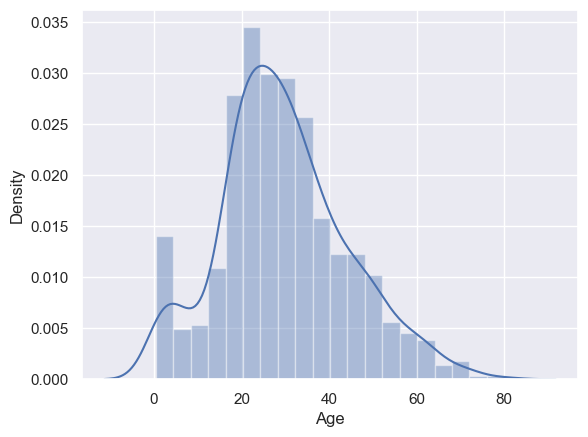

In [12]:
sns.distplot(df['Age'], hist = True)
plt.show()

In [13]:
df['Age'].skew()

0.38910778230082704

#### Insights : From Distribution plot , we get to know data is more or close to normal distribution but also it is skewed to right also............. so  we impute missing values of age by median

In [14]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [15]:
df['Age'].fillna(df['Age'].median() , inplace = True)

In [16]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


#### Missing value imputation done with Age feature

#### Embarked

In [17]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [18]:
df['Embarked'].isnull().sum()

2

In [19]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [20]:
df['Embarked'].mode()[0]

'S'

In [21]:
df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace = True)

In [22]:
df['Embarked'].isnull().sum()

0

In [23]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


### Cross check missing values

In [24]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 2. Handling Characters

In [25]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


#### Sex and Embarked

###### Sex

In [26]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

#### We can apply OneHotEncoding

In [27]:
df = pd.get_dummies(data = df , columns = ['Sex'])

In [28]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0


#### when we doing it OneHotEncoding always keep in mind it create dummy trap variable issue i.e. multicollinearity . so need to drop one column

##### n-1

In [29]:
df.drop('Sex_female'  , axis = 1 , inplace = True)

In [30]:
df.rename({'Sex_male':'Sex'} ,axis = 1,  inplace = True)

In [31]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0


#### Embarked

In [32]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### We cam apply here LabelEncoding Here

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
label = LabelEncoder()

In [35]:
label

LabelEncoder()

In [36]:
df['Embarked'] = label.fit_transform(df['Embarked'])

In [37]:
df["Embarked"].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [38]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0


##### 3. Handling Outliers

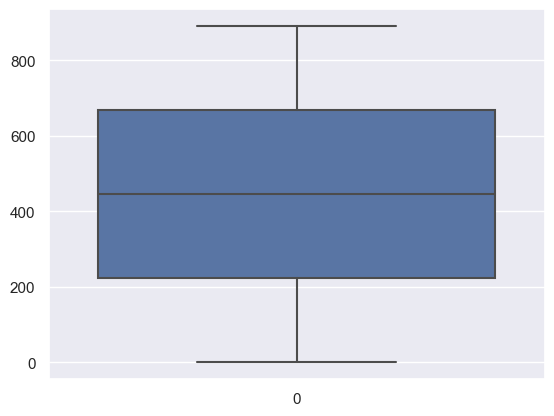

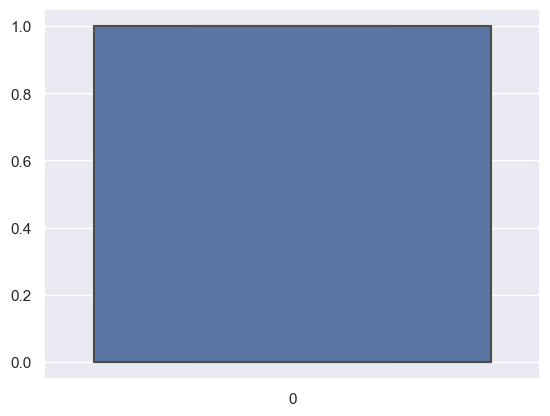

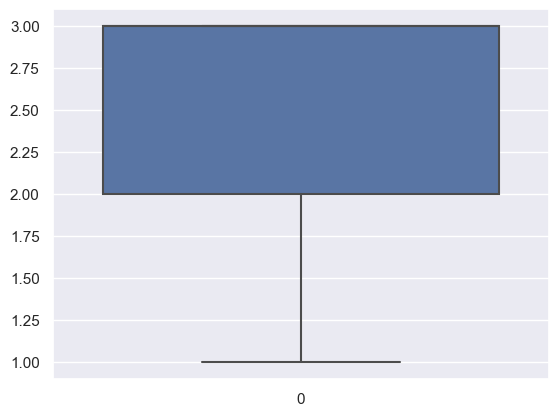

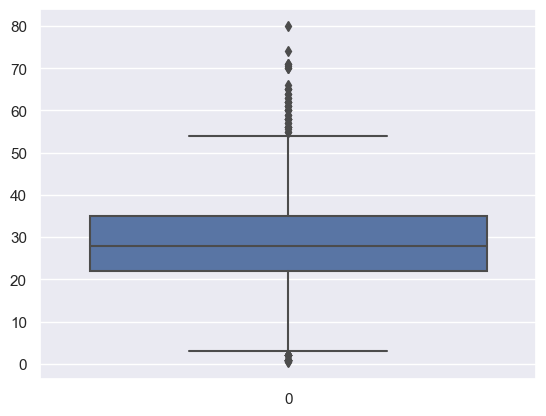

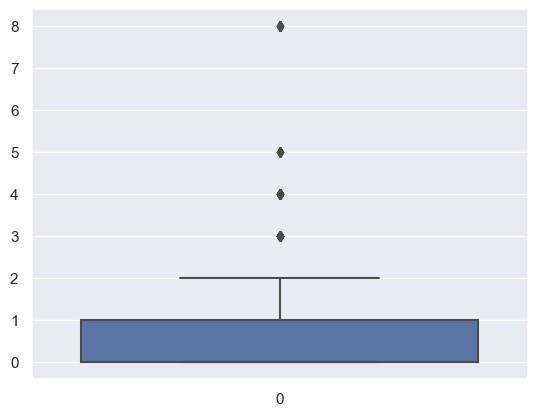

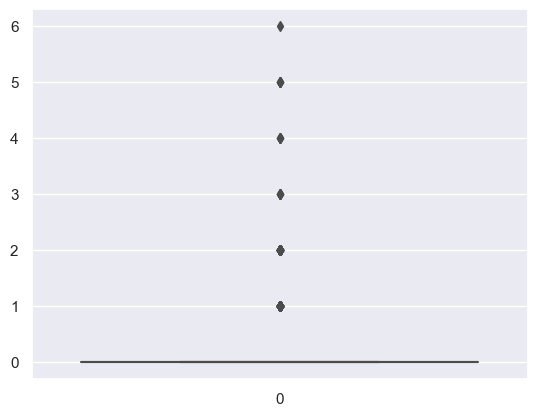

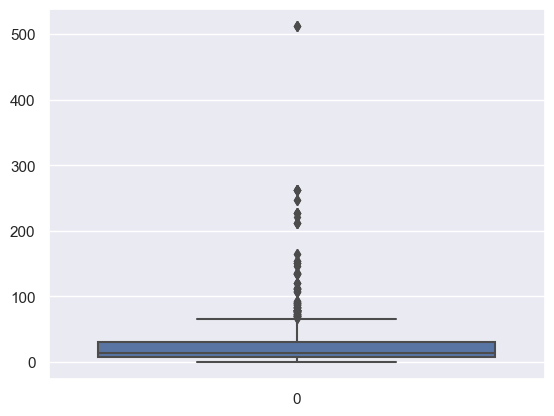

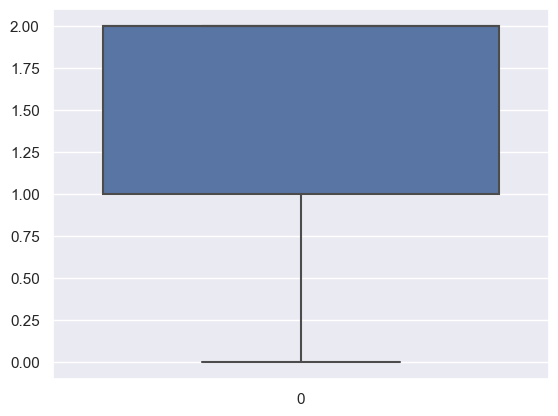

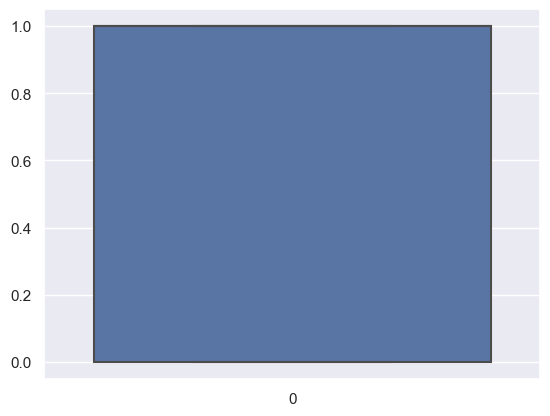

In [39]:
def detect_outliers(col):
    
    sns.boxplot(df[col])
    plt.show()
    
    
for i in list(df.select_dtypes(exclude = 'object').columns)[:]:
    
    detect_outliers(i)

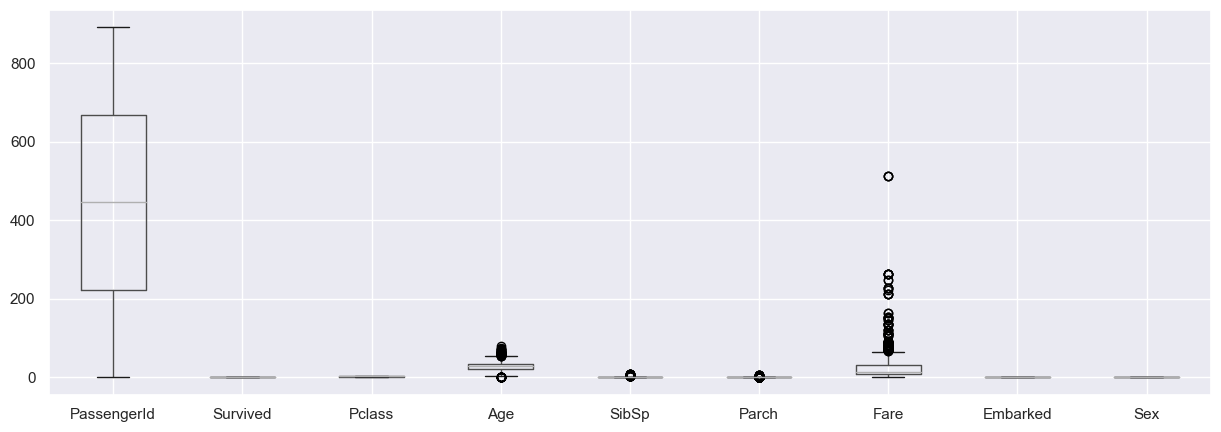

In [40]:
plt.figure(figsize = (15,5))
df.boxplot()
plt.show()

##### SibSp and parch are categorical columns so no need to treate outliers there

In [41]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [42]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

####  IQR Age

In [43]:
Q1_age = df['Age'].quantile(0.25)
Q2_age = df['Age'].quantile(0.50)
Q3_age = df['Age'].quantile(0.75)

IQR_age = Q3_age - Q1_age

upper_limit_age = Q3_age + (1.5 * IQR_age)
lower_limit_age = Q1_age - (1.5 * IQR_age)

print('Q1_age :' , Q1_age)
print('Q2_age :' , Q2_age)
print('Q3_age :' , Q3_age)

print('IQR_age :' , IQR_age)

print('Upper limit age :' , upper_limit_age)
print('Lower limit age :' , lower_limit_age)

Q1_age : 22.0
Q2_age : 28.0
Q3_age : 35.0
IQR_age : 13.0
Upper limit age : 54.5
Lower limit age : 2.5


In [44]:
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

#### Capping of Age

In [45]:
df['Age'] = np.where(df['Age'] > upper_limit_age , upper_limit_age , 
        np.where(df['Age'] < lower_limit_age , lower_limit_age , df['Age']))

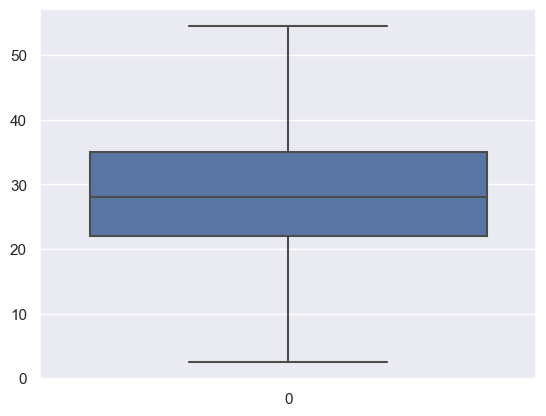

In [46]:
sns.boxplot(df['Age'])
plt.show()

#### Fare

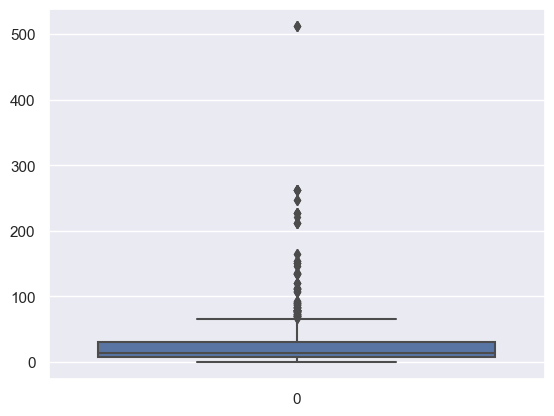

In [47]:
sns.boxplot(df['Fare'])
plt.show()

##### IQR of Fare

In [48]:
Q1_Fare = df['Fare'].quantile(0.25)
Q2_Fare = df['Fare'].quantile(0.50)
Q3_Fare = df['Fare'].quantile(0.75)

IQR_Fare = Q3_Fare - Q1_Fare

upper_limit_Fare = Q3_Fare + (1.5 * IQR_Fare)
lower_limit_Fare = Q1_Fare - (1.5 * IQR_Fare)

print('Q1_Fare :' , Q1_Fare)
print('Q2_Fare :' , Q2_Fare)
print('Q3_Fare :' , Q3_Fare)

print('IQR_Fare :' , IQR_Fare)

print('Upper limit Fare :' , upper_limit_Fare)
print('Lower limit Fare :' , lower_limit_Fare)

Q1_Fare : 7.9104
Q2_Fare : 14.4542
Q3_Fare : 31.0
IQR_Fare : 23.0896
Upper limit Fare : 65.6344
Lower limit Fare : -26.724


In [49]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

#### Capping Fare

In [50]:
df['Fare'] = np.where(df['Fare'] > upper_limit_Fare , upper_limit_Fare , 
         np.where(df['Fare'] < lower_limit_Fare , lower_limit_Fare , df['Fare']))

In [51]:
df['Fare'].head(2)

0     7.2500
1    65.6344
Name: Fare, dtype: float64

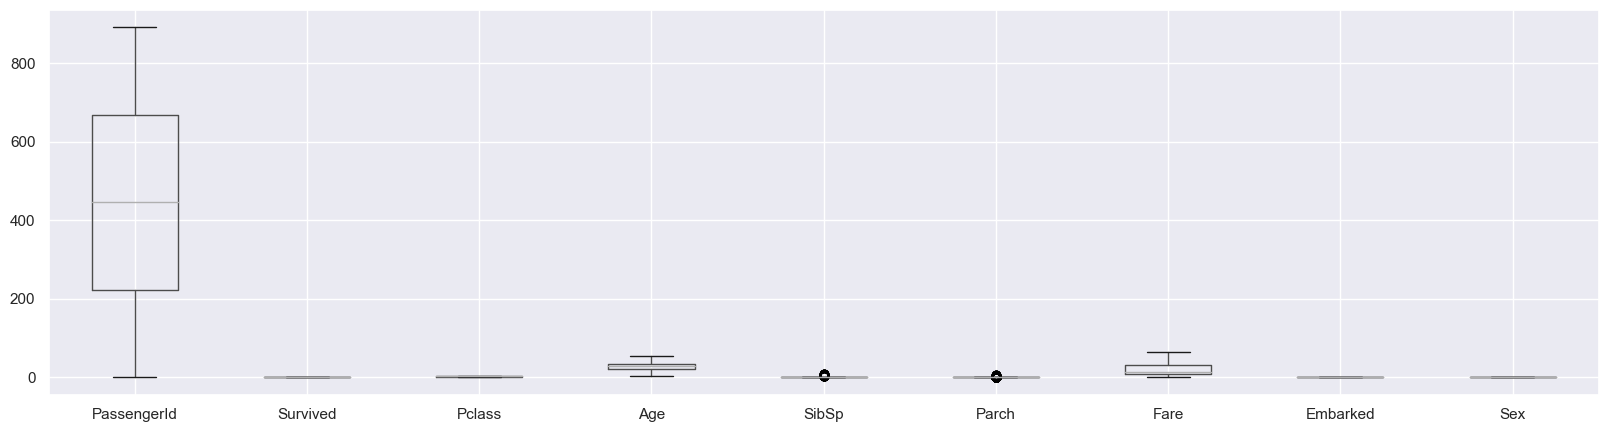

In [52]:
plt.figure(figsize = (20,5))
df.boxplot()
plt.show()

### Correlation

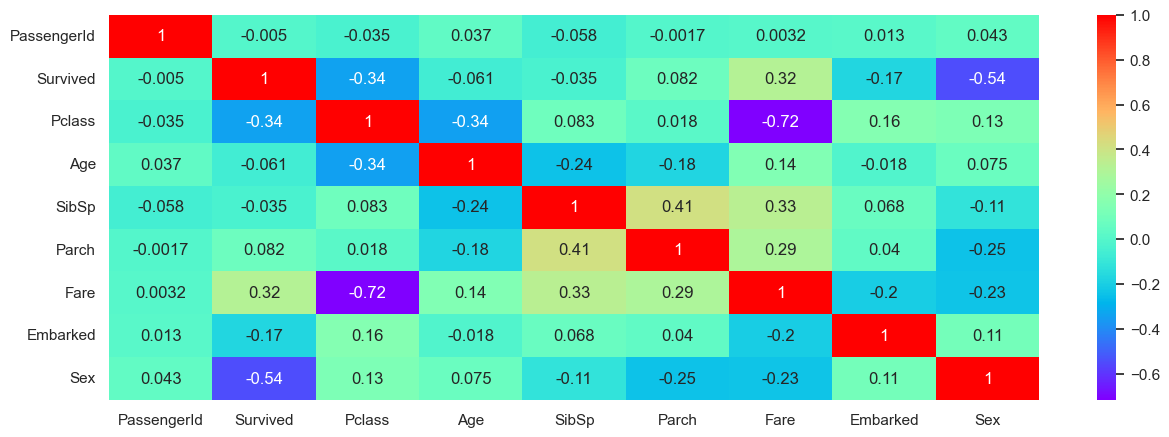

In [53]:
plt.figure(figsize = (15 , 5))
sns.heatmap(df.corr() , annot = True , cmap = 'rainbow' , cbar = True)
plt.show()

#### We remove Age , Name and Tciket because this variables are not statically significant with dependent variable

### Here we perform Chi Test for to check variables are significant or not 

In [54]:
#df['Name'] = label.fit_transform(df['Name'])
df['Ticket'] = label.fit_transform(df['Ticket'])

#### Q.When I perform chi square test on it I get values less than 0.05 

In [55]:
import pandas as pd
from scipy.stats import chi2_contingency

# Perform chi-square test for Name and survival
contingency_table = pd.crosstab(df["Name"], df["Survived"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test for Name: p-value =", p)

Chi-square test for Name: p-value = 0.484248151973633


### Chi-square test for Name: p-value = 0.484248151973633

In [56]:
# # Perform chi-square test for Ticket and survival
contingency_table = pd.crosstab(df["Ticket"], df["Survived"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test for Ticket: p-value =", p)

Chi-square test for Ticket: p-value = 0.01152729601163775


### Chi-square test for Ticket: p-value = 0.01152729601163775

In [57]:
# # Perform chi-square test for Age and survival
contingency_table = pd.crosstab(df["Age"], df["Survived"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test for Age: p-value =", p)

Chi-square test for Age: p-value = 0.03035145753494914


### Chi-square test for Age : p-value = 0.03035145753494914

In [58]:
contingency_table = pd.crosstab(df["PassengerId"], df["Survived"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test for PassengerId: p-value =", p)

Chi-square test for PassengerId: p-value = 0.484248151973633


### Chi-square test for PassengerId: p-value = 0.484248151973633

In [59]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,523,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,596,65.6344,0,0


In [60]:
for col in df.columns:
    
    contingency_table = pd.crosstab(df[col], df["Survived"])
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-square test for {col} : p-value =", p)

Chi-square test for PassengerId : p-value = 0.484248151973633
Chi-square test for Survived : p-value = 7.352052198553542e-195
Chi-square test for Pclass : p-value = 4.549251711298793e-23
Chi-square test for Name : p-value = 0.484248151973633
Chi-square test for Age : p-value = 0.03035145753494914
Chi-square test for SibSp : p-value = 1.5585810465902147e-06
Chi-square test for Parch : p-value = 9.703526421039997e-05
Chi-square test for Ticket : p-value = 0.01152729601163775
Chi-square test for Fare : p-value = 8.021440901297484e-12
Chi-square test for Embarked : p-value = 2.3008626481449577e-06
Chi-square test for Sex : p-value = 1.1973570627755645e-58


#### Insights : From that p value by chi square test , we get to know Only PassengerId and Name is the Non Significant variable. so we are dropping it ``

In [61]:
#This only dropping Name
df.drop(['Name' , 'PassengerId'] , axis = 1 , inplace = True)

### 4.Feature scaling

In [62]:
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex
0,0,3,22.0,1,0,523,7.2500,2,1
1,1,1,38.0,1,0,596,65.6344,0,0


In [63]:
original_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [64]:
x = df.iloc[: , 1:]
y = df.iloc[: , 0]

In [65]:
x.head(2)

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex
0,3,22.0,1,0,523,7.2500,2,1
1,1,38.0,1,0,596,65.6344,0,0


In [66]:
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

#### Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

In [69]:
scaled_x = scaler.fit_transform(x)

In [70]:
scaled_x = pd.DataFrame(scaled_x , columns = x.columns)

In [71]:
scaled_x

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex
0,0.827377,-0.583432,0.432793,-0.473674,0.918966,-0.820552,0.585954,0.737695
1,-1.566107,0.742685,0.432793,-0.473674,1.282625,2.031623,-1.942303,-1.355574
2,0.827377,-0.251903,-0.474545,-0.473674,1.646283,-0.787578,0.585954,-1.355574
3,-1.566107,0.494038,0.432793,-0.473674,-1.442322,1.419297,0.585954,-1.355574
4,0.827377,0.494038,-0.474545,-0.473674,0.664904,-0.781471,0.585954,0.737695
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.169020,-0.474545,-0.473674,-1.183277,-0.539655,0.585954,0.737695
887,-1.566107,-0.832079,-0.474545,-0.473674,-1.616678,0.290823,0.585954,-1.355574
888,0.827377,-0.086138,0.432793,2.008933,1.676173,-0.029155,0.585954,-1.355574
889,-1.566107,-0.251903,-0.474545,-0.473674,-1.646568,0.290823,-1.942303,0.737695


### 5. Check Data Balance

In [72]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [73]:
majority_class = 549
minority_class  = 342

In [74]:
if minority_class * 2 <= majority_class :
    
    print('Data is imbalance')
    
else:
    print('Data is Balance')

Data is Balance


##### Here Data is  Balance

#### split data into train and test

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 12 , stratify = y)

In [77]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(668, 8) (223, 8) (668,) (223,)


#### x_train_scaled and x_test_scaled

In [78]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Building Logistic Regression Model

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
logit = LogisticRegression(multi_class = 'ovr')

In [81]:
logit

LogisticRegression(multi_class='ovr')

### Training Model

In [82]:
logit.fit(x_train , y_train)

LogisticRegression(multi_class='ovr')

In [83]:
y_train_pred = logit.predict(x_train)

In [84]:
y_train_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,

In [85]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

#### confusion matrix of train

In [86]:
cm_train = confusion_matrix(y_train , y_train_pred)

In [87]:
cm_train

array([[353,  59],
       [ 73, 183]], dtype=int64)

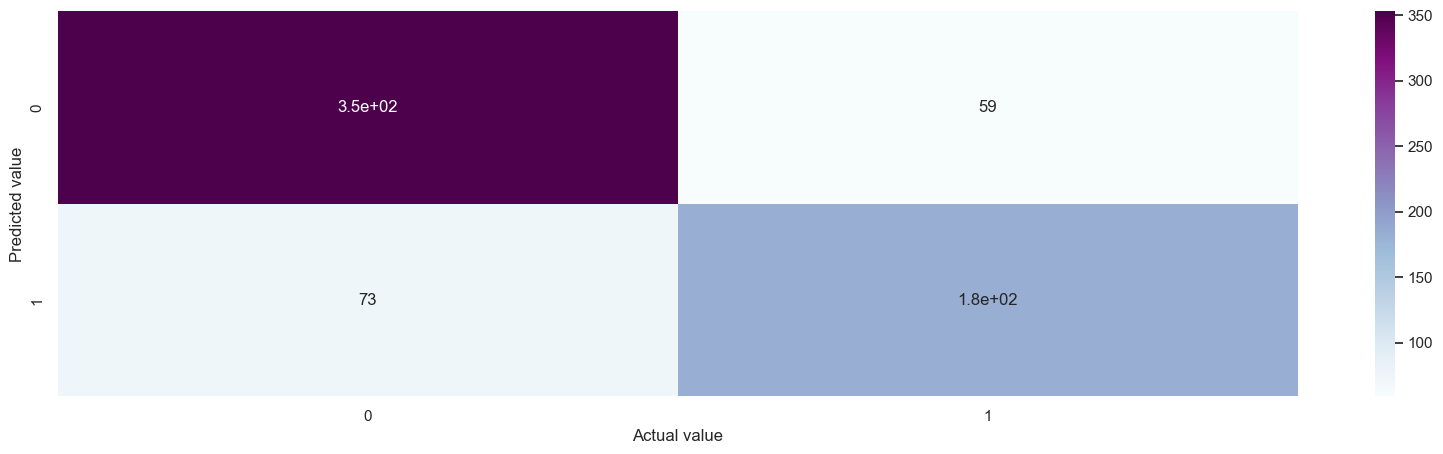

In [88]:
plt.figure(figsize = (20,5))
sns.heatmap(cm_train , annot = True , cmap = 'BuPu' , cbar = True)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.show()

#### Classification  report test

In [89]:
print(classification_report(y_train , y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       412
           1       0.76      0.71      0.73       256

    accuracy                           0.80       668
   macro avg       0.79      0.79      0.79       668
weighted avg       0.80      0.80      0.80       668



#### Training Accuracy of logistic

In [90]:
training_accuracy_logit = accuracy_score(y_train , y_train_pred)

In [91]:
training_accuracy_logit

0.8023952095808383

### Test model logit

In [92]:
logit.fit(x_test  , y_test)

LogisticRegression(multi_class='ovr')

In [93]:
y_test_pred = logit.predict(x_test)

In [94]:
y_test_pred

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1], dtype=int64)

#### Confusion matrix

In [95]:
cm_test = confusion_matrix(y_test , y_test_pred)

In [96]:
cm_test

array([[118,  19],
       [ 23,  63]], dtype=int64)

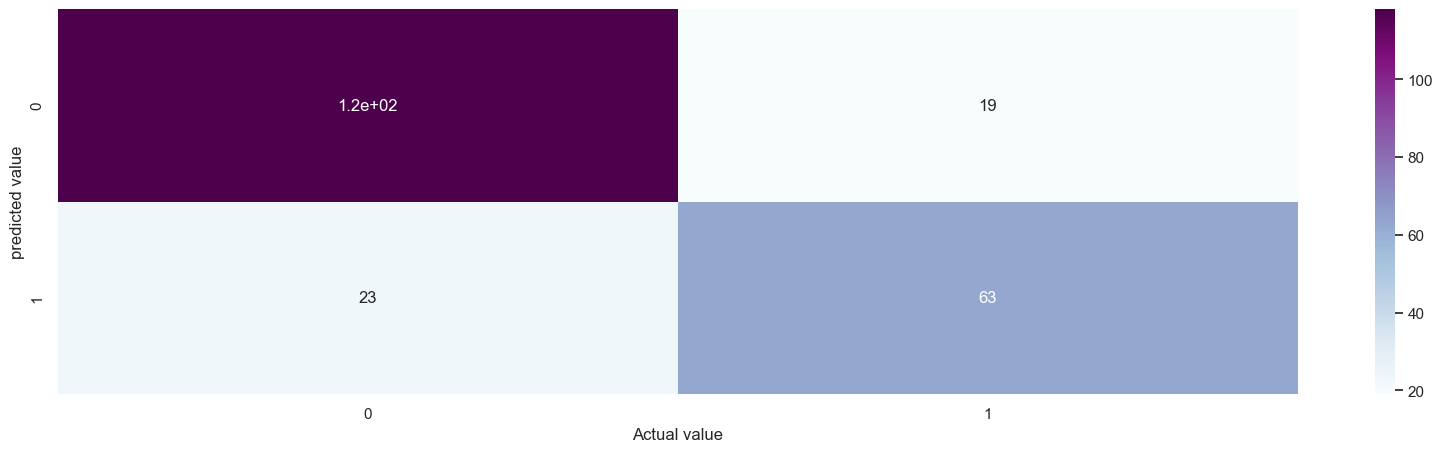

In [97]:
plt.figure(figsize = (20,5))
sns.heatmap(cm_test , annot = True , cmap = 'BuPu' , cbar = True)
plt.xlabel('Actual value')
plt.ylabel('predicted value')
plt.show()

In [98]:
testing_accuracy_logit = accuracy_score(y_test , y_test_pred)

In [99]:
testing_accuracy_logit 

0.8116591928251121

#### Classification_report test

In [100]:
print(classification_report(y_test , y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       137
           1       0.77      0.73      0.75        86

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [101]:
print('Training Accuracy of logistic is :' , training_accuracy_logit)
print('Testing Accuracy of logistic is :' , testing_accuracy_logit)

Training Accuracy of logistic is : 0.8023952095808383
Testing Accuracy of logistic is : 0.8116591928251121


#### Insights : Logistic Model is Most Accurate (most generalised) because there no overfitting and underfitting . but we try to improve accuracy

### K Fold Cross Validation

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
cs = cross_val_score(logit , x_train , y_train , cv = 10)

In [104]:
cs.mean()

0.7889416553595658

##### max accuracy by cross val score

In [105]:
cs.max()

0.8507462686567164

### ROC with AUC 

In [106]:
from sklearn.metrics import roc_auc_score

In [107]:
logistic_roc_auc = roc_auc_score(y_test, y_test_pred)
logistic_roc_auc

# clf = LogisticRegression(solver="liblinear").fit(x_train, y_train)
# preds = clf.predict_proba(x_test)
# roc_auc = roc_auc_score(y_test,preds, multi_class='ovr')
# print(roc_auc)

0.7969360040740112

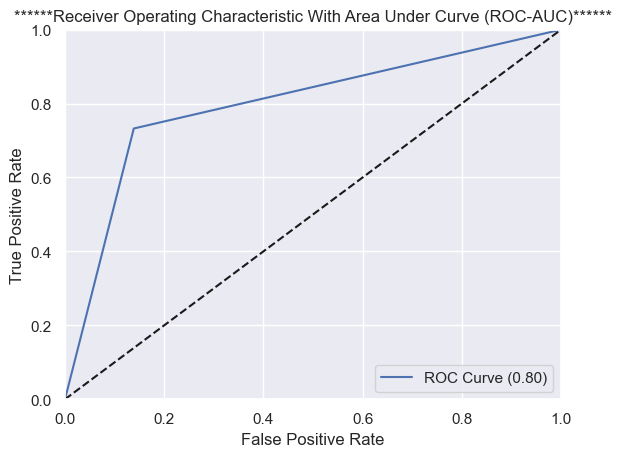

In [108]:
from sklearn.metrics import roc_curve
# this build roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % logistic_roc_auc)
# this build AUC curve
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

### RandomForestClassifier

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rf = RandomForestClassifier(n_estimators=500)

In [111]:
rf.fit(x_train , y_train)

RandomForestClassifier(n_estimators=500)

In [112]:
y_train_pred_rf = rf.predict(x_train)

#### Testing Accuracy RandomForest

In [113]:
training_accuracy_rf = accuracy_score(y_train , y_train_pred_rf)

In [114]:
training_accuracy_rf

0.9985029940119761

##### Testing model RandomForestClassifier

In [117]:
rf.fit(x_test , y_test)

RandomForestClassifier(n_estimators=500)

In [118]:
y_test_pred_rf = rf.predict(x_test)

In [119]:
y_test_pred_rf

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1], dtype=int64)

#### Testing Accuracy

In [120]:
accuracy_score(y_test , y_test_pred_rf)

1.0